# HILL CLIMBING - TSP

Aplicação do algoritmo Hill Climbing para solucionar
o problema do caixeiro viajante (TSP)

> Para mais informações sobre o **Algoritmo Hill-climbing**, leia o link abaixo:
>>    https://en.wikipedia.org/wiki/Hill_climbing

> Uma implementação bem simplista
>>    https://towardsdatascience.com/how-to-implement-the-hill-climbing-algorithm-in-python-1c65c29469de

---

> Para mais informações sobre o **TSP-problem (Problema do Caixeiro Viajante)**, leia os links abaixo:

>>    https://pt.wikipedia.org/wiki/Problema_do_caixeiro-viajante

>>    https://en.wikipedia.org/wiki/Travelling_salesman_problem

>    NP-Hard

>>    https://pt.wikipedia.org/wiki/NP-dif%C3%ADcil

---

## Importações

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Geração de números aleatórios
import random

In [2]:
# Geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Funções Auxiliares

### Solução Aleatória

In [3]:
# Cria uma solucao inicial com as cidades em um ordem aleatoria

def solucao_aleatoria(tsp):
    cidades = list(tsp.keys())
    solucao = []

    # as 3 linhas abaixo não são estritamente necessarias, servem
    # apenas para fixar a primeira cidade da lista na solução
    cidade = cidades[0]
    solucao.append(cidade)
    cidades.remove(cidade)

    for _ in range(0,len(cidades)):
        #print(_, cidades, solucao)
        cidade = random.choice(cidades)

        solucao.append(cidade)
        cidades.remove(cidade)

    return solucao

In [4]:
# Cria uma solucao inicial com as cidades em um ordem de PROXIMIDADE
# testes demonstraram que esta solução fica presa em um mínimo local

# def solucao_aleatoria(tsp):
#     cidades = list(tsp.keys())
#     solucao = []

#     # as 3 linhas abaixo não são estritamente necessarias, servem
#     # apenas para fixar a primeira cidade da lista na solução
#     cidade = cidades[0]
#     solucao.append(cidade)
#     cidades.remove(cidade)

#     for _ in range(0,len(cidades)):
#         #print(_, cidades, solucao, ">>>")

#         dist_cid = tsp.loc[cidade].items()
#         idx_val   = [(idx,val) for idx,val in dist_cid
#                         if val>0 and idx not in solucao]

#         cidade = min(idx_val, key=lambda k: k[1])[0]

#         #print(_,cidade, idx_val, list(dist_cid))

#         solucao.append(cidade)
#         cidades.remove(cidade)

#     return solucao

### Calcula Custo

In [5]:
# Função Objetivo: calcula custo de uma dada solução.
# Obs: Neste caso do problema do caixeiro viajante (TSP problem),
# o custo é o comprimento da rota entre todas as cidades.
def calcula_custo(tsp, solucao):

    N = len(solucao)
    custo = 0

    for i in range(N):

        # Quando chegar na última cidade, será necessário
        # voltar para o início para adicionar o
        # comprimento da rota da última cidade
        # até a primeira cidade, fechando o ciclo.
        #
        # Por isso, a linha abaixo:
        k = (i+1) % N
        cidadeA = solucao[i]
        cidadeB = solucao[k]

        custo += tsp.loc[cidadeA, cidadeB]

        #print(tsp.loc[cidadeA, cidadeB], cidadeA,cidadeB)

    return custo

### Gera Vizinhos

Obs: a função `obtem_vizinhos` descrita abaixo foi gerada de forma simplificada, pois ela assume que todos os vizinhos possuem rota direta entre si. Isto tem caráter didático para simplifcar a solução. Observe que na prática isso nem sempre existe rotas diretas entre todas as cidades e, em tais casos, pode ser necessário modificar a função para corresponder a tais restrições.

In [6]:
# A partir de uma dada solução, gera diversas variações (vizinhos)
def gera_vizinhos(solucao):

    N = len(solucao)
    for i in range(1, N):       # deixa o primeiro fixo
        for j in range(i + 1, N):
            vizinho = solucao.copy()
            vizinho[i] = solucao[j]
            vizinho[j] = solucao[i]

            yield(vizinho)


### Seleciona Melhor Vizinho

In [7]:
def obtem_melhor_vizinho(tsp, solucao):
    melhor_custo = calcula_custo(tsp, solucao)
    melhor_vizinho = solucao

    for vizinho in gera_vizinhos(solucao):
        custo_atual = calcula_custo(tsp, vizinho)
        if custo_atual < melhor_custo:
            melhor_custo = custo_atual
            melhor_vizinho = vizinho

    return melhor_vizinho, melhor_custo


### Random-Walk - clássico

In [8]:
def obtem_vizinho_aleatorio(tsp, solucao):

    vizinhos = list(gera_vizinhos(solucao))

    aleatorio_vizinho  = random.choice(vizinhos)
    aleatorio_custo    = calcula_custo(tsp, aleatorio_vizinho)

    return aleatorio_vizinho, aleatorio_custo


In [9]:
def random_walk(tsp):
    solucao_inicial = solucao_aleatoria(tsp)

    atual_solucao, atual_custo = obtem_vizinho_aleatorio(tsp, solucao_inicial)

    for _ in range(30):
        atual_solucao, atual_custo = obtem_vizinho_aleatorio(tsp, atual_solucao)

    return atual_custo, atual_solucao

### Hill-Climbing - clássico

In [10]:
# def hill_climbing(tsp):
#     solucao_inicial = solucao_aleatoria(tsp)

#     melhor_solucao, melhor_custo = obtem_melhor_vizinho(tsp, solucao_inicial)

#     while True:
#         vizinho_atual = melhor_solucao
#         custo_atual   = melhor_custo

#         melhor_solucao, melhor_custo = obtem_melhor_vizinho(tsp, vizinho_atual)
#         #print(melhor_custo)

#         if custo_atual <= melhor_custo:
#             break

#     return custo_atual, melhor_solucao

In [54]:
def hill_climbing(tsp):

    # solucao inicial
    solucao_inicial = solucao_aleatoria(tsp)
    print(solucao_inicial)
    # melhor solucao ate o momento
    solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

    while True:

        # tenta obter um candidato melhor
        candidato_atual, custo_atual = obtem_melhor_vizinho(tsp, solucao_melhor)
        #print(custo_melhor, custo_atual)

        if custo_atual < custo_melhor:
            custo_melhor   = custo_atual
            solucao_melhor = candidato_atual
        else:
            break   # custo nao melhorou, entao sai do while

    return custo_melhor, solucao_melhor

In [ ]:
# def hill_climbing_restart(tsp):

#     # solucao inicial
#     solucao_inicial = solucao_aleatoria(tsp)
#     # melhor solucao ate o momento
#     solucao_melhor, custo_melhor = obtem_melhor_vizinho(tsp, solucao_inicial)

#     while True:

#         # tenta obter um candidato melhor
#         candidato_atual, custo_atual = obtem_melhor_vizinho(tsp, solucao_melhor)
#         #print(custo_melhor, custo_atual)

#         if custo_atual < custo_melhor:
#             custo_melhor   = custo_atual
#             solucao_melhor = candidato_atual
#         else:
#             break   # custo nao melhorou, entao sai do while

#     return custo_melhor, solucao_melhor

### Cálculo da Matriz de Distâncias

In [55]:
from math import sqrt

In [56]:
# distancia Euclidiana entre dois pontos
def distancia(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    return sqrt(dx**2 + dy**2)

In [57]:
# Calcula matriz de distancias.
#
# OBS:  Não é estritamente necessario calculá-las a priori.
#       Foi feito assim apenas para fins didáticos.
#       Ao invés, as distâncias podem ser calculadas sob demanda.

def gera_matriz_distancias(Coordenadas):

    n_cidades = len(Coordenadas)
    dist = np.zeros((n_cidades,n_cidades), dtype=float)

    for i in range(0, n_cidades):
        for j in range(i+1, n_cidades):
            x1,y1 = Coordenadas.iloc[i]
            x2,y2 = Coordenadas.iloc[j]

            dist[i,j] = distancia(x1,y1,x2,y2)
            dist[j,i] = dist[i,j]

    return dist

### Gerador de Problemas Aleatórios

In [58]:
# Gera aleatoriamente as coordenadas de N cidades.
# Obs: esta informação geralmente é fornecida como entrada do problema.

def gera_coordenadas_aleatorias(n_cidades):
    minimo = 10
    maximo = 90
    escala = (maximo-minimo)-1

    # gera n coordenadas (x,y) aleatorias entre [min, max]
    X = minimo + escala * np.random.rand(n_cidades)
    Y = minimo + escala * np.random.rand(n_cidades)
    coordenadas = {'X':X, 'Y': Y}

    cidades = ['A'+str(i) for i in range(n_cidades)]

    df_cidades = pd.DataFrame(coordenadas, index=cidades)
    df_cidades.index.name = 'CIDADE'

    return df_cidades


In [59]:
# Recebe uma lista com as coordenadas reais de uma cidade e
# gera uma matriz de distancias entre as cidades.
# Obs: a matriz é simetrica e com diagonal nula
def gera_problema_tsp(df_cidades):
    # nomes ficticios das cidades
    cidades = df_cidades.index

    # calcula matriz de distancias
    distancias = gera_matriz_distancias(df_cidades)

    # cria estrutura para armazena as distâncias entre todas as cidades
    tsp = pd.DataFrame(distancias, columns=cidades, index=cidades)

    return tsp

### Plota Rotas

In [60]:
# # Plota Rotas usando a biblioteca SEABORN
# def plota_rotas_sns(df_cidades, ordem_cidades):
#     # Plota a solução do roteamento das cidades
#     df_solucao = df_cidades.copy()
#     df_solucao = df_solucao.reindex(ordem_cidades)

#     sns.scatterplot(data = df_solucao, x = 'X', y = 'Y', s=50)
#     sns.lineplot(data = df_solucao, x = 'X', y = 'Y', sort=False, estimator=None)

#     # liga a última à primeira cidade para fechar o ciclo
#     sns.lineplot(data = df_solucao.iloc[[-1,0]], x = 'X', y = 'Y', sort=False)

#     n_lin = df_solucao.shape[0] # numero de linhas do df
#     X = df_solucao['X']
#     Y = df_solucao['Y']

#     # loop para adicionar anotações uma a uma
#     for i in range(0, n_lin):
#         plt.text(X.iloc[i], Y.iloc[i], df_solucao.index[i],
#                 horizontalalignment='left', size='medium',
#                 color='black', weight='semibold')

#     plt.show()

In [61]:
# Plota a solução do roteamento das cidades
# usando a biblioteca PLOTLY
def plota_rotas(df_cidades, ordem_cidades):
    df_solucao = df_cidades.copy()
    df_solucao = df_solucao.reindex(ordem_cidades)

    X = df_solucao['X']
    Y = df_solucao['Y']
    cidades = list(df_solucao.index)

    # cria objeto gráfico
    fig = go.Figure()

    fig.update_layout(autosize=False, width=500, height=500, showlegend=False)

    # gera linhas com as rotas da primeira ate a ultima cidade
    fig.add_trace(go.Scatter(x=X, y=Y,
                             text=cidades, textposition='bottom center',
                             mode='lines+markers+text',
                             name=''))

    # acrescenta linha da última para a primeira para fechar o ciclo
    fig.add_trace(go.Scatter(x=X.iloc[[-1,0]], y=Y.iloc[[-1,0]],
                             mode='lines+markers', name=''))

    fig.show()

### Boxplots

In [62]:
def boxplot_sorted(df, rot=90, figsize=(12,6), fontsize=20):
    df2 = df.T
    meds = df2.median().sort_values(ascending=False)
    axes = df2[meds.index].boxplot(figsize=figsize, rot=rot, fontsize=fontsize,
                                   boxprops=dict(linewidth=4, color='cornflowerblue'),
                                   whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                                   medianprops=dict(linewidth=4, color='firebrick'),
                                   capprops=dict(linewidth=4, color='cornflowerblue'),
                                   flierprops=dict(marker='o', markerfacecolor='dimgray',
                                        markersize=12, markeredgecolor='black'),
                                   return_type="axes")

    axes.set_title("Cost of Algorithms", fontsize=fontsize)

## Execução

### Executa 1 vez

In [63]:
# Simula a criação de N cidades
# com suas respectivas distâncias

n_cidades=10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)
df_coordenadas

,X,Y
CIDADE,,
A0,33.912971,79.257717
A1,29.802902,36.727416
A2,54.734885,58.694666
A3,35.042391,10.034897
A4,46.657778,35.021399
A5,56.442236,84.201266
A6,46.179874,18.225799
A7,58.970971,86.733399
A8,34.442632,28.501463


In [64]:
tsp = gera_problema_tsp(df_coordenadas)
tsp

CIDADE,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9
CIDADE,,,,,,,,,,
A0,0.000000,42.728435,29.264162,69.232033,46.035659,23.065265,62.252485,26.149364,50.759017,58.099501
A1,42.728435,0.000000,33.228961,27.201890,16.940996,54.437308,24.708603,57.891058,9.444226,37.926961
A2,29.264162,33.228961,0.000000,52.493499,25.013261,25.563679,41.363237,28.356921,36.378635,29.744673
A3,69.232033,27.201890,52.493499,0.000000,27.554355,77.191992,13.825137,80.344491,18.476303,38.992961
A4,46.035659,16.940996,25.013261,27.554355,0.000000,50.143742,16.802398,53.157743,13.846276,20.999586
A5,23.065265,54.437308,25.563679,77.191992,50.143742,0.000000,66.768842,3.578575,59.886982,53.551598
A6,62.252485,24.708603,41.363237,13.825137,16.802398,66.768842,0.000000,69.691488,15.599748,25.187082
A7,26.149364,57.891058,28.356921,80.344491,53.157743,3.578575,69.691488,0.000000,63.187007,55.593021
A8,50.759017,9.444226,36.378635,18.476303,13.846276,59.886982,15.599748,63.187007,0.000000,33.126738


In [65]:
solucao = ['A'+str(i) for i in range(n_cidades)]
solucao
plota_rotas(df_coordenadas, solucao)

In [66]:
solucao = solucao_aleatoria(tsp)
print(solucao)
plota_rotas(df_coordenadas, solucao)

['A0', 'A6', 'A1', 'A3', 'A5', 'A2', 'A7', 'A9', 'A4', 'A8']


In [97]:
# busca local da melhor solução e o seu custo
custo, solucao = hill_climbing(tsp)

print(f'{custo:7.3f}    {solucao}')

plota_rotas(df_coordenadas, solucao)

['A0', 'A7', 'A4', 'A2', 'A1', 'A6', 'A5', 'A9', 'A3', 'A8']
214.655    ['A0', 'A5', 'A7', 'A2', 'A9', 'A6', 'A3', 'A8', 'A1', 'A4']


In [ ]:
for _ in range(10):
    custo, solucao = hill_climbing(tsp)

    print(f'{custo:7.3f}    {solucao}')

    plota_rotas(df_coordenadas, solucao)

### Executa N vezes - SIMPLES

In [26]:
# Executando várias vezes de forma simples

n_vezes = 30

for _ in range(n_vezes):

    #solucao, custo = random_walk(tsp)
    custo, solucao = hill_climbing(tsp)
    print(f'{custo:7.3f}, {solucao}')

234.226, ['A0', 'A1', 'A8', 'A3', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4']
251.163, ['A0', 'A7', 'A6', 'A9', 'A4', 'A1', 'A8', 'A3', 'A2', 'A5']
236.634, ['A0', 'A3', 'A8', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4', 'A1']
234.226, ['A0', 'A1', 'A8', 'A3', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4']
234.226, ['A0', 'A1', 'A8', 'A3', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4']
234.226, ['A0', 'A4', 'A9', 'A6', 'A7', 'A2', 'A5', 'A3', 'A8', 'A1']
234.226, ['A0', 'A1', 'A8', 'A3', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4']
251.163, ['A0', 'A7', 'A6', 'A9', 'A4', 'A1', 'A8', 'A3', 'A2', 'A5']
242.030, ['A0', 'A1', 'A7', 'A6', 'A9', 'A4', 'A8', 'A3', 'A2', 'A5']
271.107, ['A0', 'A9', 'A6', 'A7', 'A2', 'A5', 'A3', 'A8', 'A4', 'A1']
236.509, ['A0', 'A1', 'A8', 'A4', 'A9', 'A6', 'A7', 'A2', 'A5', 'A3']
236.634, ['A0', 'A1', 'A4', 'A9', 'A6', 'A7', 'A2', 'A5', 'A8', 'A3']
236.634, ['A0', 'A3', 'A8', 'A5', 'A2', 'A7', 'A6', 'A9', 'A4', 'A1']
231.379, ['A0', 'A1', 'A4', 'A9', 'A6', 'A7', 'A8', 'A3', 'A2', 'A5']
251.163, ['A0', 'A5'

Observe que há uma certa variabilidade na soluções acima. Isto se deve à característica estocástica do algoritmo de solução.

---

### Executa N vezes - ESTRUTURADA com DataFrame

A seguir, é apresentada uma forma mais estruturada de se rodar várias vezes usando a estrutura de dados **`DataFrame`** para armazenar os resultados e permitir visualização de box-plots

In [27]:
# Cria estruta de dados (DataFrame) para armazenar vários resultados
# diferentes e visualizá-los através de estatísticas

def cria_df_custos(algoritmos, n_vezes):

    nomes_algoritmos  = algoritmos.keys()

    n_lin = len(nomes_algoritmos)
    n_col = n_vezes

    df_results = pd.DataFrame(np.zeros((n_lin,n_col)),
                              index=nomes_algoritmos)
    df_results.index.name='ALGORITMO'

    return df_results

In [28]:
# Executa N vezes para gerar estatísticas da variável custo
def executa_n_vezes(tsp, algoritmos, n_vezes):

    # Cria DataFrame para armazenar os resultados
    df_custo = cria_df_custos(algoritmos, n_vezes)

    for algoritmo, funcao_algoritmo in algoritmos.items():

        print(algoritmo)

        for i in range(n_vezes):

            custo, solucao = funcao_algoritmo(tsp)
            df_custo.loc[algoritmo,i] = custo

            print(f'{custo:10.3f}  {solucao}')

    return df_custo

In [29]:
# Dicionario com Nomes dos modelos e suas respectivas variantes
# Tuple: (Algoritmo, Variante): funcao_algoritmo
algoritmos = {
    # 'Random Walk': random_walk,
    'Hill-Climbing': hill_climbing
}

#### PROBLEMA GERADO ALEATORIAMENTE

In [30]:
###################################
# PROBLEMA GERADO ALEATORIAMENTE  #
###################################

# cria instancia do problema com n cidades

n_cidades=10
df_coordenadas = gera_coordenadas_aleatorias(n_cidades)

tsp = gera_problema_tsp(df_coordenadas)

# numero de vezes que executará cada algoritmo
n_vezes = 100

# Executa N vezes para gerar estatísticas da variável custo
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

Random Walk
   325.985  ['A0', 'A1', 'A2', 'A8', 'A4', 'A9', 'A6', 'A7', 'A5', 'A3']
   425.380  ['A0', 'A4', 'A8', 'A2', 'A5', 'A6', 'A3', 'A1', 'A7', 'A9']
   464.595  ['A0', 'A2', 'A9', 'A8', 'A4', 'A1', 'A7', 'A3', 'A5', 'A6']
   362.964  ['A0', 'A1', 'A2', 'A4', 'A8', 'A5', 'A6', 'A9', 'A7', 'A3']
   478.396  ['A0', 'A6', 'A3', 'A7', 'A9', 'A4', 'A2', 'A1', 'A5', 'A8']
   469.148  ['A0', 'A7', 'A8', 'A4', 'A1', 'A9', 'A2', 'A3', 'A5', 'A6']
   407.246  ['A0', 'A2', 'A7', 'A8', 'A1', 'A3', 'A6', 'A4', 'A9', 'A5']
   420.322  ['A0', 'A2', 'A5', 'A9', 'A8', 'A3', 'A1', 'A7', 'A4', 'A6']
   379.614  ['A0', 'A4', 'A6', 'A2', 'A5', 'A8', 'A9', 'A3', 'A7', 'A1']
   381.930  ['A0', 'A6', 'A8', 'A9', 'A4', 'A3', 'A1', 'A5', 'A7', 'A2']
   426.572  ['A0', 'A2', 'A8', 'A9', 'A5', 'A4', 'A1', 'A3', 'A6', 'A7']
   397.661  ['A0', 'A6', 'A9', 'A7', 'A1', 'A2', 'A5', 'A8', 'A4', 'A3']
   432.343  ['A0', 'A1', 'A8', 'A2', 'A6', 'A5', 'A3', 'A4', 'A9', 'A7']
   306.642  ['A0', 'A1', 'A9', 'A6', 'A

##### Box Plots

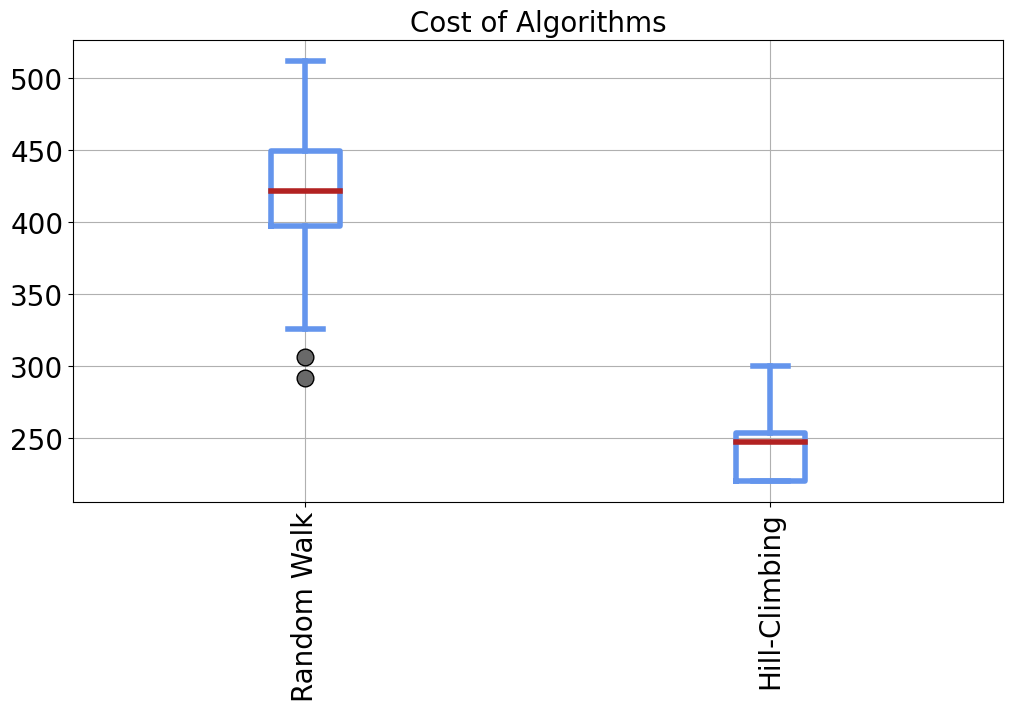

In [31]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

Observe no gráfico acima que a variabilidade do Hill-climbing é bem menor que a do Random-Walk.

Como você justifica isso?

In [32]:
df_custo.T.describe()

ALGORITMO,Random Walk,Hill-Climbing
count,100.000000,100.000000
mean,420.530422,242.222764
std,41.212107,20.233068
min,291.577431,220.313453
25%,397.394979,220.313453
50%,421.434896,247.530612
75%,449.370889,254.005484
max,512.016529,300.416772


A seguir, são apresentados alguns links de problemas reais.

Basta escolher um link de **`download de dados`**, setar a variável URL abaixo, e rodar o algoritmo.


---

#### PROBLEMAS REAIS


    Western Sahara
    29 cidades
    The optimal tour has length 27.603
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/wipoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/witour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/wi29.tsp

    Djibouti dataset
    38 cidades
    The optimal tour has length 6.656
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/djpoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/djtour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/dj38.tsp

    Qatar
    194 cidades
    The optimal tour has length 9.352
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/qapoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/qatour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/qa194.tsp

    Uruguay
    734 cidades
    The optimal tour has length 79.114
    Foto dos Pontos: http://www.math.uwaterloo.ca/tsp/world/uypoints.html
    Foto da Solução: http://www.math.uwaterloo.ca/tsp/world/uytour.html
    Download dos Dados: http://www.math.uwaterloo.ca/tsp/world/uy734.tsp

In [48]:
url_coordenadas_cidade = 'https://www.math.uwaterloo.ca/tsp/world/wi29.tsp'

df_coordenadas = pd.read_table(
                    url_coordenadas_cidade,
                    skiprows=7,           # ignora as 7 primeiras linhas com informações
                    names=['X', 'Y'],     # nomes das colunas
                    sep=' ',              # separador das colunas
                    index_col=0,          # usar col=0 como index (nome das cidades)
                    skipfooter=1,         # ignora a última linha (EOF)
                    engine='python'       # para o parser usar skipfooter sem warning
              )

In [49]:
# descomente a linha abaixo para conferir se os dados foram lidos corretamente

df_coordenadas

,X,Y
1,20833.3333,17100.0000
2,20900.0000,17066.6667
3,21300.0000,13016.6667
4,21600.0000,14150.0000
5,21600.0000,14966.6667
6,21600.0000,16500.0000
7,22183.3333,13133.3333
8,22583.3333,14300.0000
9,22683.3333,12716.6667
10,23616.6667,15866.6667


In [50]:
tsp = gera_problema_tsp(df_coordenadas)

#solucao, custo = random_walk(tsp)
custo, solucao = hill_climbing(tsp)
print(f'{custo:7.3f}, {solucao}')
plota_rotas(df_coordenadas, solucao)

40689.309, [1, 2, 5, 14, 27, 24, 16, 9, 7, 3, 4, 8, 13, 17, 21, 23, 18, 15, 19, 22, 29, 28, 26, 25, 20, 12, 11, 10, 6]


In [51]:
###################################
# PROBLEMA REAL #
###################################

tsp = gera_problema_tsp(df_coordenadas)

#tsp

In [52]:
n_vezes = 30

# Executa N vezes para gerar estatísticas da variável custo
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

Random Walk
 96501.917  [1, 15, 23, 2, 16, 22, 28, 18, 9, 27, 21, 25, 17, 12, 10, 26, 11, 29, 24, 19, 7, 3, 8, 14, 13, 20, 4, 5, 6]
131897.870  [1, 23, 10, 20, 5, 26, 17, 8, 14, 12, 16, 25, 9, 15, 19, 2, 3, 24, 29, 7, 18, 13, 6, 27, 21, 11, 22, 4, 28]
110216.466  [1, 22, 8, 5, 2, 21, 4, 26, 11, 25, 20, 16, 9, 7, 18, 15, 12, 14, 13, 24, 3, 19, 27, 29, 6, 10, 17, 28, 23]
114358.633  [1, 12, 13, 8, 27, 29, 17, 10, 22, 6, 19, 24, 4, 23, 28, 7, 18, 26, 5, 3, 14, 16, 21, 20, 2, 11, 9, 25, 15]
121982.750  [1, 25, 4, 28, 18, 3, 17, 6, 8, 2, 22, 16, 5, 13, 29, 7, 27, 15, 26, 20, 10, 12, 11, 23, 14, 24, 9, 21, 19]
104800.126  [1, 8, 5, 23, 3, 18, 20, 21, 14, 24, 29, 12, 25, 6, 10, 26, 19, 22, 7, 13, 16, 17, 28, 15, 2, 27, 9, 4, 11]
118907.858  [1, 2, 20, 5, 23, 3, 18, 27, 29, 21, 22, 7, 4, 28, 19, 12, 10, 17, 6, 16, 14, 8, 26, 11, 9, 15, 25, 13, 24]
112886.847  [1, 21, 2, 24, 8, 3, 28, 7, 13, 17, 18, 25, 9, 16, 20, 29, 26, 22, 19, 4, 14, 12, 11, 10, 5, 15, 23, 6, 27]
104250.442  [1, 5, 6, 14, 21

In [53]:
df_custo

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
ALGORITMO,,,,,,,,,,,,,,,,,,,,,
Random Walk,96501.916925,131897.869866,110216.465558,114358.633357,121982.749786,104800.126408,118907.857588,112886.846949,104250.442038,114683.533086,...,113214.188607,116503.168843,100102.351987,108489.677912,95551.394677,90886.484497,118141.113165,111087.696628,112347.802340,96837.541497
Hill-Climbing,36579.642045,36349.421304,33379.430730,38285.830219,36722.424849,38939.228104,43680.973496,35327.713558,29749.243770,52785.175208,...,36776.102511,30656.041449,38092.085940,46087.420496,33598.116717,30802.745208,39143.642019,49508.887456,30430.187795,33971.072963


### Plota a rota da melhor solução obtida

In [38]:
# Hill-climbing

# Melhor solucao encontrada
# 28340.563  [1, 2, 6, 5, 4, 3, 7, 9, 8, 13, 14, 16, 24, 27, 25, 20, 26, 28, 29, 23, 22, 21, 17, 18, 19, 15, 12, 10, 11]

solucao = [1, 2, 6, 5, 4, 3, 7, 9, 8, 13, 14, 16, 24, 27, 25, 20, 26, 28, 29, 23, 22, 21, 17, 18, 19, 15, 12, 10, 11]

plota_rotas(df_coordenadas, solucao)

In [39]:
# Solucao otima
solucao = [1, 6, 10, 11, 12, 15, 19, 18, 17, 21, 22, 23, 29, 28, 26, 20, 25, 27, 24, 16, 14, 13, 9, 7, 3, 4, 8, 5, 2]

plota_rotas(df_coordenadas, solucao)

##### Box Plots

In [40]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

In [41]:
df_custo.T.describe()

ALGORITMO,Random Walk,Hill-Climbing
count,30.000000,30.000000
mean,108956.731795,39719.324823
std,9444.957451,5008.270248
min,92243.375311,32243.101954
25%,102053.483941,36796.036816
50%,110189.528356,37865.067615
75%,115364.872388,43098.847476
max,127395.010991,51571.946222


---

## Exercícios


1) Utilizando os códigos acima como base, implemente as variações do Hill-Climbing a seguir:

* **Stochastic hill-­climbing**

chooses at random from among the uphill moves;
the probability of selection can vary with the steepness of the uphill move.
This usually converges more slowly than steepest ascent, but in some state landscapes, it finds better solutions.


* **First­-choice hill-­climbing**

implements stochastic hill climbing by generating successors randomly until one is generated that is better than the current state. This is a good strategy when a state has many (e.g. thousands) of successors.


* **Random­-restart hill-­climbing**

is a complete version of hill-­climbing. It adopts the well­known adage, “If at first you don’t succeed, try, try again.” It
conducts a series of hill-­climbing searches from randomly generated initial states, until a goal is found. It is trivially complete with probability approaching 1, because it will eventually generate a goal state as the initial state.

Implementações das Variants do Hill-Climbing


In [42]:
# Stochastic hill-­climbing

def hill_climbing_stochastic(tsp):
    # ponha seu código aqui


SyntaxError: incomplete input (28508414.py, line 4)

In [ ]:
# First­-choice hill-­climbing

def hill_climbing_firstchoice(tsp):
    # ponha seu código aqui


In [ ]:
# Random­-restart hill­-climbing

def hill_climbing_randomrestart(tsp):
    # ponha seu código aqui


In [ ]:
# Para rodar tudo junto:

algoritmos = {
    #'Random Walk - classic': solucao_aleatoria,
    'Hill-Climbing': hill_climbing,
    'Hill-Climbing - stochastic': hill_climbing_stochastic,
    'Hill-Climbing - first-choice': hill_climbing_firstchoice,
    'Hill-Climbing - random-restart': hill_climbing_randomrestart
    # ...
}

In [ ]:
tsp = gera_problema_tsp(df_coordenadas)

# numero de vezes que executará cada algoritmo
n_vezes = 30

# Executa N vezes para gerar estatísticas da variável custo
# DataFrame df_custo serve para armazenar todos os resultados
df_custo = executa_n_vezes(tsp, algoritmos, n_vezes)

In [ ]:
boxplot_sorted(df_custo, rot=90, figsize=(12,6), fontsize=20)

In [ ]:
df_custo.T.describe()